In [1]:
# importing liabraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# importing datset
df_lab = pd.read_excel('./final_data.xlsx')
df_lab.drop('Unnamed: 0', axis=1, inplace=True)
df_lab.head()

,Patient ID,Agent ID,pincode,patient location,Latitudes and Longitudes (Patient),Latitudes and Longitudes (Agent),Latitudes and Longitudes (Diagnostic Center),Diagnostic Centers,Time slot,shortest distance Agent-Pathlab(m),...,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date,Time For Sample Collection MM,Time Agent-Pathlab sec,Agent Arrival Time (range) HH:MM,Exact Arrival Time MM
0,MD1001,26,500019,Serilingampalle (M),"17.480944, 78.321500","17.476422, 78.327109","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 21:00 (Home),2713,...,2022-01-01,12:04:00,Vitamin B-12,Blood,Vaccum blood collection tube,2022-01-02,11,271.3,09:05 to 09:55,34
1,MD1002,40,500084,Serilingampalle (M),"17.482750, 78.340586","17.473802, 78.335612","17.494695, 78.344071",Medquest Diagnostics Center,19:00 to 22:00 (working person),2490,...,2022-01-02,11:12:00,HbA1c,Blood,Vaccum blood collection tube,2022-01-03,10,249.0,19:05 to 19:55,39
2,MD1003,19,502032,Ramachandrapuram,"17.518403, 78.310165","17.519385, 78.306378","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),4849,...,2022-01-03,12:24:00,CBC,Blood,Vaccum blood collection tube,2022-01-04,12,484.9,14:05 to 14:55,24
3,MD1004,45,500049,Miyapur,"17.511200, 78.357393","17.488280, 78.384516","17.494695, 78.344071",Medquest Diagnostics Center,19:00 to 22:00 (working person),4348,...,2022-01-04,13:38:00,Vitamin D-25Hydroxy,Blood,Vaccum blood collection tube,2022-01-05,7,434.8,21:05 to 21:55,39
4,MD1005,12,500090,Nizampet,"17.503342, 78.384344","17.513819, 78.360140","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),2725,...,2022-01-05,16:01:00,TSH,Blood,Vaccum blood collection tube,2022-01-06,10,272.5,13:05 to 13:55,39


In [3]:
df_lab.shape, df_lab.dtypes

((1304, 25),
 Patient ID                                              object
 Agent ID                                                 int64
 pincode                                                 object
 patient location                                        object
 Latitudes and Longitudes (Patient)                      object
 Latitudes and Longitudes (Agent)                        object
 Latitudes and Longitudes (Diagnostic Center)            object
 Diagnostic Centers                                      object
 Time slot                                               object
 shortest distance Agent-Pathlab(m)                       int64
 shortest distance Patient-Pathlab(m)                     int64
 shortest distance Patient-Agent(m)                       int64
 Availabilty time (Patient)                              object
 Age                                                      int64
 Gender                                                  object
 Test Booking Date         

In [4]:
df_lab['pincode'].unique()

array([500019, 500084, 502032, 500049, 500090, 500032, 500050, 500081,
       500055, 500037, 500072, 500054, 500085, 500018, 500033, 500077,
       501510, 500023, 500053, 502324, 500075, 500048, 500004, 500029,
       500038, 500057, 500013, 500034, 500009, 501301, 500133, 500042,
       500028, 500008, 500030, 500003, '\xa0500034', 500082, 500016,
       500026, 500015, 502325, 500045, 502117, 508126, 502334, 509408,
       502372, 500011, 500068, 500100, 500073, 500014, 500096, 500089,
       500025, 500061, 500017, 500063, 500001, 500002, 500007, 500010,
       500020, 500044, 500047, 500052, 500059, 500062, 500064, 500065,
       500069, 500074, 500078, 500091, 500092], dtype=object)

In [5]:
df_lab['Time slot'].unique(),

(array(['06:00 to 21:00 (Home)', '19:00 to 22:00 (working person)',
        '06:00 to 18:00 (Collect at work place)'], dtype=object),)

In [25]:
df_lab[['pincode']] = df_lab[['pincode']].astype('int')
df_lab.head()

,Patient ID,Agent ID,pincode,patient location,Latitudes and Longitudes (Patient),Latitudes and Longitudes (Agent),Latitudes and Longitudes (Diagnostic Center),Diagnostic Centers,Time slot,shortest distance Agent-Pathlab(m),...,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date,Time For Sample Collection MM,Time Agent-Pathlab sec,Agent Arrival Time (range) HH:MM,Exact Arrival Time MM
0,MD1001,26,500019,Serilingampalle (M),"17.480944, 78.321500","17.476422, 78.327109","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 21:00 (Home),2713,...,2022-01-01,12:04:00,Vitamin B-12,Blood,Vaccum blood collection tube,2022-01-02,11,271.3,09:05 to 09:55,34
1,MD1002,40,500084,Serilingampalle (M),"17.482750, 78.340586","17.473802, 78.335612","17.494695, 78.344071",Medquest Diagnostics Center,19:00 to 22:00 (working person),2490,...,2022-01-02,11:12:00,HbA1c,Blood,Vaccum blood collection tube,2022-01-03,10,249.0,19:05 to 19:55,39
2,MD1003,19,502032,Ramachandrapuram,"17.518403, 78.310165","17.519385, 78.306378","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),4849,...,2022-01-03,12:24:00,CBC,Blood,Vaccum blood collection tube,2022-01-04,12,484.9,14:05 to 14:55,24
3,MD1004,45,500049,Miyapur,"17.511200, 78.357393","17.488280, 78.384516","17.494695, 78.344071",Medquest Diagnostics Center,19:00 to 22:00 (working person),4348,...,2022-01-04,13:38:00,Vitamin D-25Hydroxy,Blood,Vaccum blood collection tube,2022-01-05,7,434.8,21:05 to 21:55,39
4,MD1005,12,500090,Nizampet,"17.503342, 78.384344","17.513819, 78.360140","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),2725,...,2022-01-05,16:01:00,TSH,Blood,Vaccum blood collection tube,2022-01-06,10,272.5,13:05 to 13:55,39


In [4]:
df_lab.shape, df_lab.dtypes

((1304, 25),
 Patient ID                                              object
 Agent ID                                                 int64
 pincode                                                  int64
 patient location                                        object
 Latitudes and Longitudes (Patient)                      object
 Latitudes and Longitudes (Agent)                        object
 Latitudes and Longitudes (Diagnostic Center)            object
 Diagnostic Centers                                      object
 Time slot                                               object
 shortest distance Agent-Pathlab(m)                       int64
 shortest distance Patient-Pathlab(m)                     int64
 shortest distance Patient-Agent(m)                       int64
 Availabilty time (Patient)                              object
 Age                                                      int64
 Gender                                                  object
 Test Booking Date         

In [8]:
# label encoding for visualization purposes

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

copy = df_lab.copy()

copy['Patient ID'] = le.fit_transform(copy['Patient ID'])
copy['Latitudes and Longitudes (Patient)'] = le.fit_transform(copy['Latitudes and Longitudes (Patient)'])
copy['Latitudes and Longitudes (Agent)'] = le.fit_transform(copy['Latitudes and Longitudes (Agent)'])
copy['Latitudes and Longitudes (Diagnostic Center)'] = le.fit_transform(copy['Latitudes and Longitudes (Diagnostic Center)'])
copy['Diagnostic Centers'] = le.fit_transform(copy['Diagnostic Centers'])
copy['Time slot'] = le.fit_transform(copy['Time slot'])
copy['Gender'] = le.fit_transform(copy['Gender'])
# copy['Test Booking Time HH:MM'] = le.fit_transform(copy['Test Booking Time HH:MM'])
copy['Test name'] = le.fit_transform(copy['Test name'])
copy['Sample'] = le.fit_transform(copy['Sample'])
copy['Way Of Storage Of Sample'] = le.fit_transform(copy['Way Of Storage Of Sample'])

copy.head()


,Patient ID,Agent ID,pincode,patient location,Latitudes and Longitudes (Patient),Latitudes and Longitudes (Agent),Latitudes and Longitudes (Diagnostic Center),Diagnostic Centers,Time slot,shortest distance Agent-Pathlab(m),...,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date,Time For Sample Collection MM,Time Agent-Pathlab sec,Agent Arrival Time (range) HH:MM,Exact Arrival Time MM
0,384,26,500019,Serilingampalle (M),654,754,137,5,1,2713,...,2022-01-01,12:04:00,8,0,2,2022-01-02,11,271.3,09:05 to 09:55,34
1,385,40,500084,Serilingampalle (M),670,744,137,5,2,2490,...,2022-01-02,11:12:00,4,0,2,2022-01-03,10,249.0,19:05 to 19:55,39
2,386,19,502032,Ramachandrapuram,985,1091,137,5,0,4849,...,2022-01-03,12:24:00,0,0,2,2022-01-04,12,484.9,14:05 to 14:55,24
3,387,45,500049,Miyapur,974,841,137,5,2,4348,...,2022-01-04,13:38:00,9,0,2,2022-01-05,7,434.8,21:05 to 21:55,39
4,388,12,500090,Nizampet,927,1076,137,5,0,2725,...,2022-01-05,16:01:00,7,0,2,2022-01-06,10,272.5,13:05 to 13:55,39


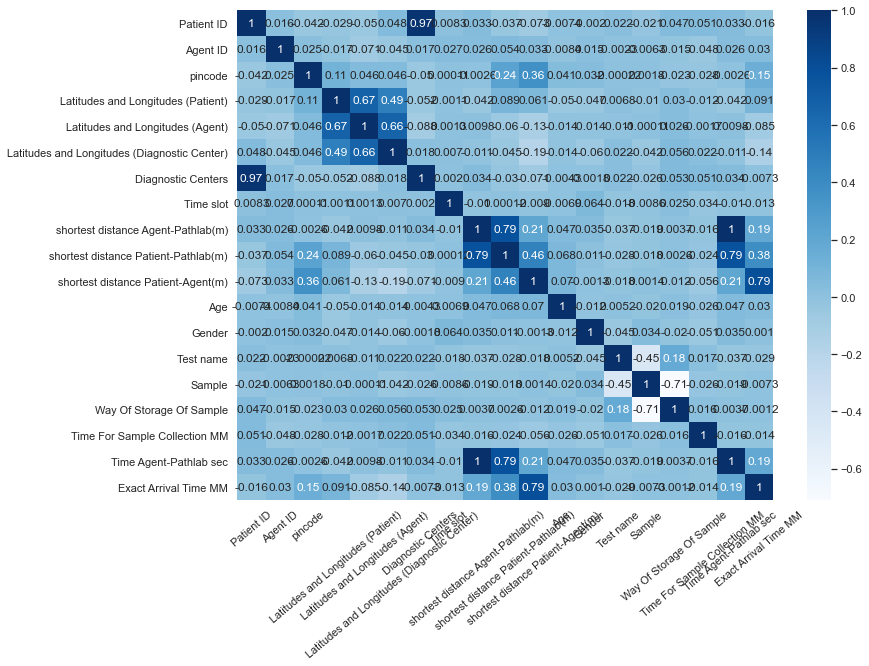

In [78]:
# finding correlation
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(copy.corr(),cbar=True,annot=True,cmap='Blues');
plt.xticks(rotation=40);

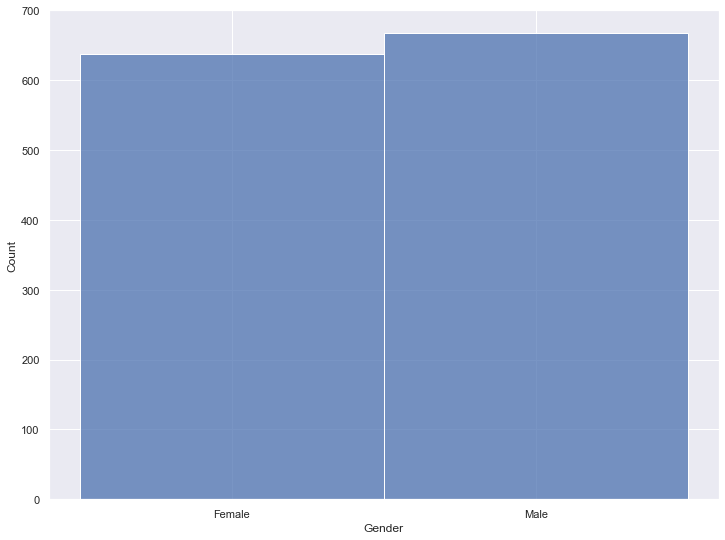

In [81]:
#Univariate plot
sns.histplot(data=df_lab, x="Gender")
plt.show()

##### Male Patients are slightly more than Female patient

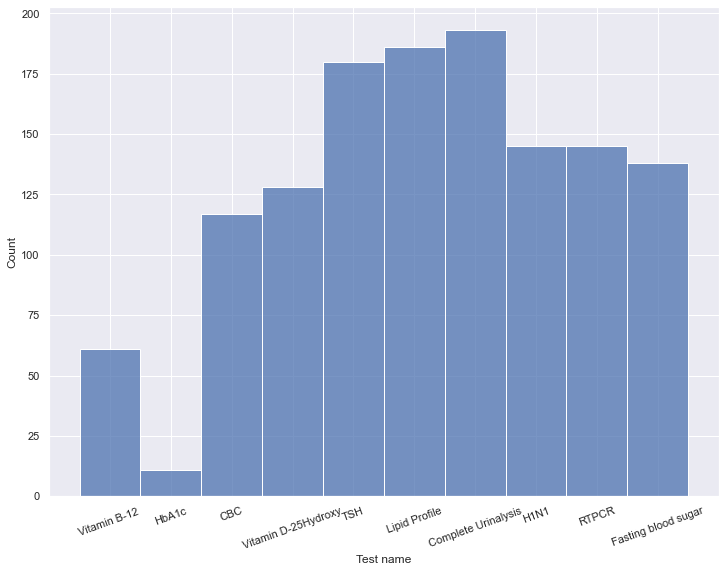

In [85]:
sns.histplot(data=df_lab, x="Test name")
plt.xticks(rotation=20)
plt.show()


##### Top 3 Tests are Complete Urinalysis, Lipid Profile, TSH

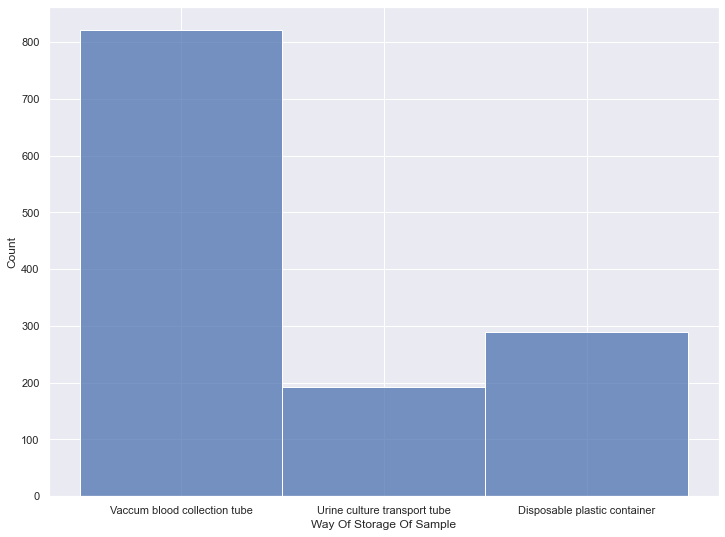

In [87]:
sns.histplot(data=df_lab, x="Way Of Storage Of Sample")
plt.show()

##### Vaccume Blood collection tube is mostly used

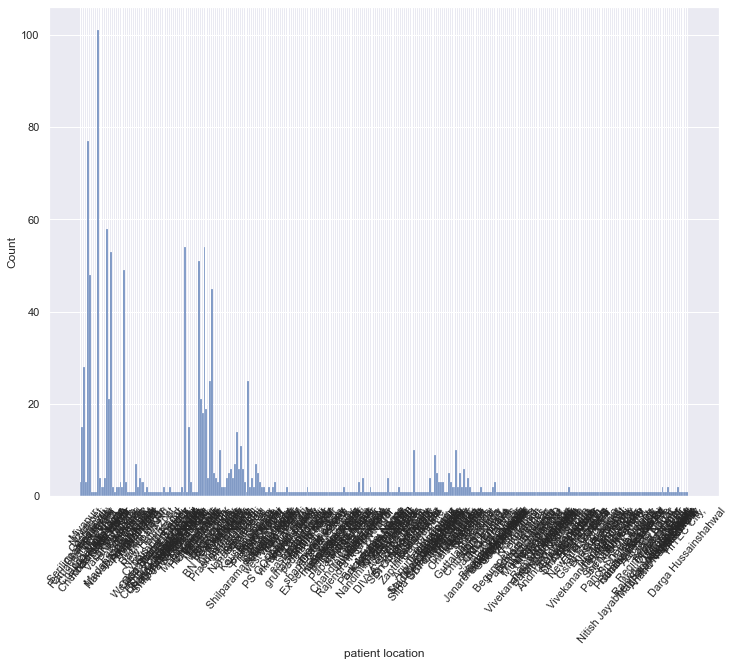

In [92]:
sns.histplot(data=df_lab, x="patient location")
plt.xticks(rotation=50)
plt.show()

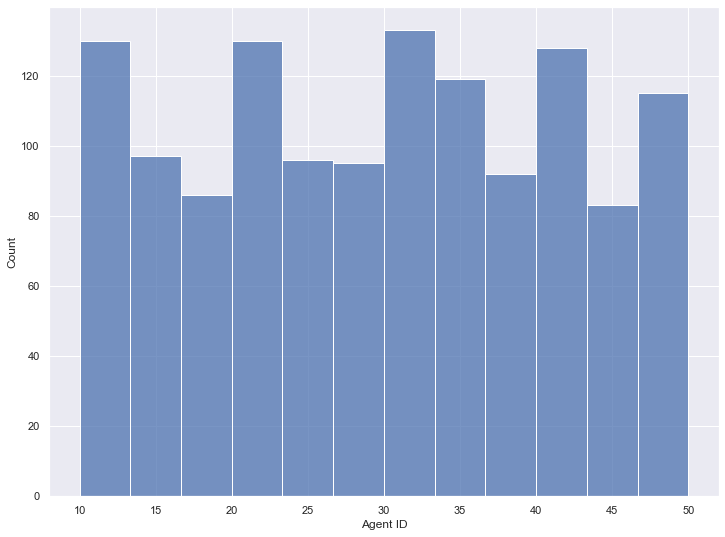

In [94]:
sns.histplot(data=df_lab, x="Agent ID")
plt.show()

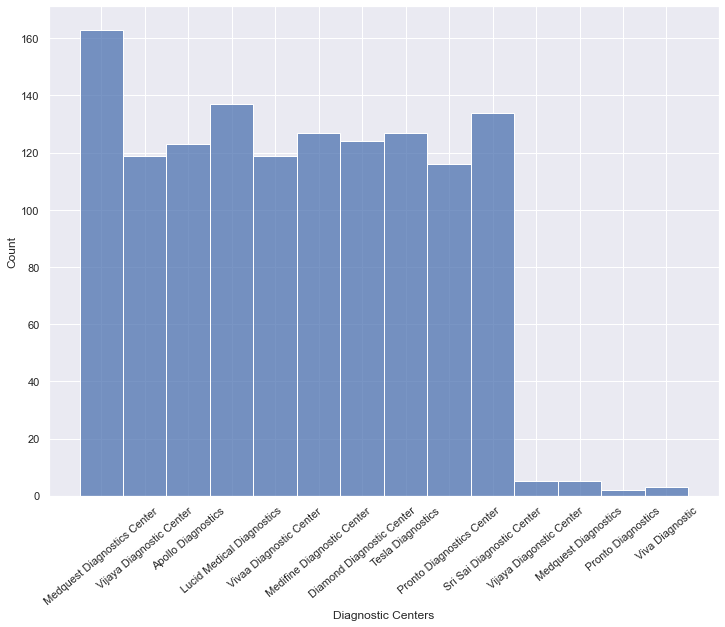

In [98]:
sns.histplot(data=df_lab, x="Diagnostic Centers")
plt.xticks(rotation=40)
plt.show()

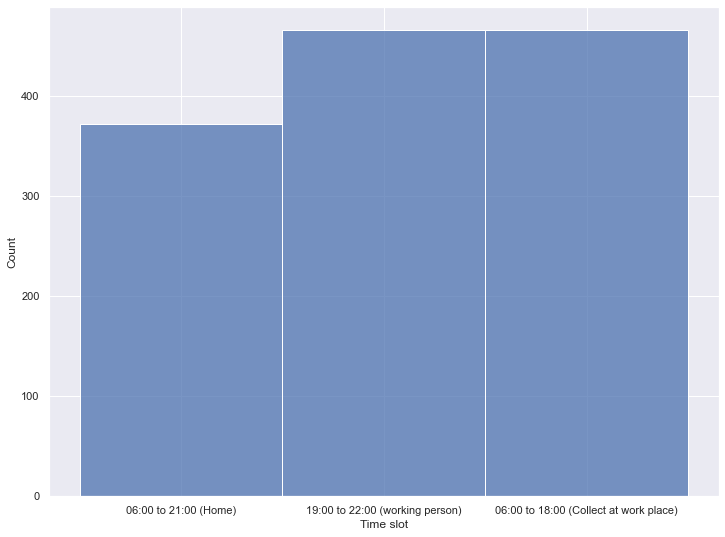

In [99]:
sns.histplot(data=df_lab, x="Time slot")
plt.show()

##### 7pm to 9pm(Working Person) and 6am to 6pm(Collection at work place) are highest 

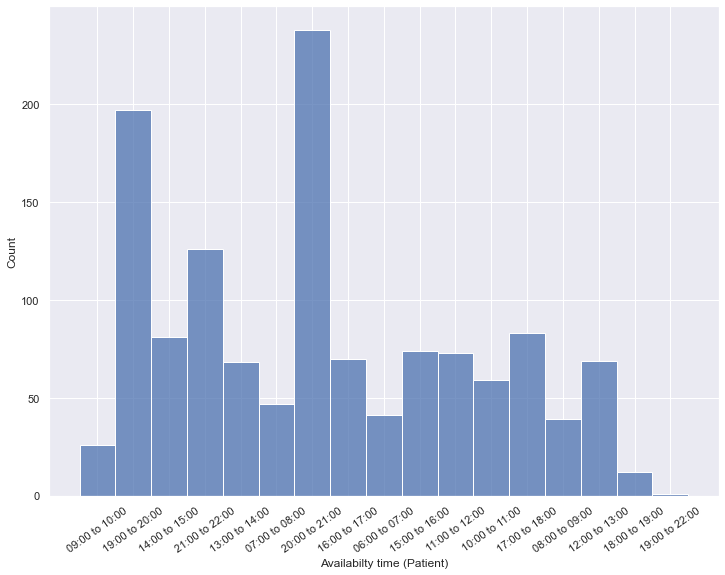

In [102]:
sns.histplot(data=df_lab, x="Availabilty time (Patient)")
plt.xticks(rotation=35)
plt.show()

##### Patiens avilability is 20 - 21

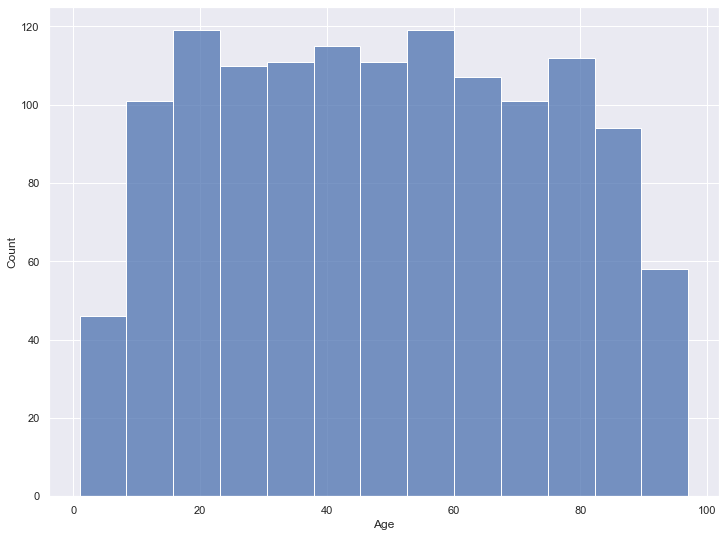

In [104]:
sns.histplot(data=df_lab, x="Age")
plt.show()

In [19]:
df_lab.sample(7)

,Patient ID,Agent ID,pincode,patient location,Latitudes and Longitudes (Patient),Latitudes and Longitudes (Agent),Latitudes and Longitudes (Diagnostic Center),Diagnostic Centers,Time slot,shortest distance Agent-Pathlab(m),...,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date,Time For Sample Collection MM,Time Agent-Pathlab sec,Agent Arrival Time (range) HH:MM,Exact Arrival Time MM
538,MD1050,48,500019,Lingampally,"17.475589, 78.300841","17.519138, 78.355429","17.494695, 78.344071",Medquest Diagnostics Center,19:00 to 22:00 (working person),2972,...,2022-02-04,10,Lipid Profile,Blood,Vaccum blood collection tube,2022-02-05,19,297.2,19:05 to 19:55,49
115,LMD1014,42,500019,Kukatpally,"17.496391, 78.398746","17.423686, 78.428958","17.423346, 78.428958",Lucid Medical Diagnostics,19:00 to 22:00 (working person),37,...,2022-04-26,10:03:00,H1N1,Swab,Disposable plastic container,2022-04-27,5,3.7,20:05 to 20:55,49
1140,AD1106,25,500004,Masabtank,"17.451647, 78.369386","17.40613845583951, 78.45460686594843","17.407776455548056, 78.45117363871745",Apollo Diagnostics,19:00 to 22:00 (working person),407,...,2022-05-13,22:15:00,Vitamin D-25Hydroxy,Blood,Vaccum blood collection tube,2022-05-14,6,40.7,19:05 to 19:55,54
800,AD1083,33,500084,Hafeezpet,"17.475616, 78.355364","17.472955, 78.363958","17.451647, 78.369386",Apollo Diagnostics,06:00 to 21:00 (Home),2438,...,2022-05-09,15,Fasting blood sugar,Blood,Vaccum blood collection tube,2022-05-11,9,243.8,10:05 to 10:55,34
258,MD1017,44,500050,Chanda Nagar,"17.490495, 78.322156","17.489858, 78.340508","17.494695, 78.344071",Medquest Diagnostics Center,19:00 to 22:00 (working person),657,...,2022-04-01,10:56:00,H1N1,Swab,Disposable plastic container,2022-04-03,8,65.7,20:05 to 20:55,39
647,AD1062,25,500084,SBI officers colony,"17.4612014237, 78.337082165","17.448526, 78.384446","17.451647, 78.369386",Apollo Diagnostics,19:00 to 22:00 (working person),1634,...,2022-05-24,12,Complete Urinalysis,Urine,Urine culture transport tube,2022-05-25,8,163.4,20:05 to 20:55,49
1074,LMD1109,50,500034,Panch Sheela Colony,"17.487304, 78.430667","17.403938, 78.439166","17.423346, 78.428958",Lucid Medical Diagnostics,06:00 to 18:00 (Collect at work place),2414,...,2022-03-08,6,H1N1,Swab,Disposable plastic container,2022-03-09,18,241.4,12:05 to 12:55,49


In [10]:
df_lab.shape, df_lab.dtypes

((1304, 25),
 Patient ID                                              object
 Agent ID                                                 int64
 pincode                                                  int64
 patient location                                        object
 Latitudes and Longitudes (Patient)                      object
 Latitudes and Longitudes (Agent)                        object
 Latitudes and Longitudes (Diagnostic Center)            object
 Diagnostic Centers                                      object
 Time slot                                               object
 shortest distance Agent-Pathlab(m)                       int64
 shortest distance Patient-Pathlab(m)                     int64
 shortest distance Patient-Agent(m)                       int64
 Availabilty time (Patient)                              object
 Age                                                      int64
 Gender                                                  object
 Test Booking Date         

In [26]:
df_lab['Time Agent-Pathlab sec'] = df_lab['Time Agent-Pathlab sec']/60*5
df_lab = df_lab.rename(columns={'Time Agent-Pathlab sec': 'Time Agent-Pathlab M'})
df_lab.head()

,Patient ID,Agent ID,pincode,patient location,Latitudes and Longitudes (Patient),Latitudes and Longitudes (Agent),Latitudes and Longitudes (Diagnostic Center),Diagnostic Centers,Time slot,shortest distance Agent-Pathlab(m),...,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date,Time For Sample Collection MM,Time Agent-Pathlab M,Agent Arrival Time (range) HH:MM,Exact Arrival Time MM
0,MD1001,26,500019,Serilingampalle (M),"17.480944, 78.321500","17.476422, 78.327109","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 21:00 (Home),2713,...,2022-01-01,12:04:00,Vitamin B-12,Blood,Vaccum blood collection tube,2022-01-02,11,22.608333,09:05 to 09:55,34
1,MD1002,40,500084,Serilingampalle (M),"17.482750, 78.340586","17.473802, 78.335612","17.494695, 78.344071",Medquest Diagnostics Center,19:00 to 22:00 (working person),2490,...,2022-01-02,11:12:00,HbA1c,Blood,Vaccum blood collection tube,2022-01-03,10,20.750000,19:05 to 19:55,39
2,MD1003,19,502032,Ramachandrapuram,"17.518403, 78.310165","17.519385, 78.306378","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),4849,...,2022-01-03,12:24:00,CBC,Blood,Vaccum blood collection tube,2022-01-04,12,40.408333,14:05 to 14:55,24
3,MD1004,45,500049,Miyapur,"17.511200, 78.357393","17.488280, 78.384516","17.494695, 78.344071",Medquest Diagnostics Center,19:00 to 22:00 (working person),4348,...,2022-01-04,13:38:00,Vitamin D-25Hydroxy,Blood,Vaccum blood collection tube,2022-01-05,7,36.233333,21:05 to 21:55,39
4,MD1005,12,500090,Nizampet,"17.503342, 78.384344","17.513819, 78.360140","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),2725,...,2022-01-05,16:01:00,TSH,Blood,Vaccum blood collection tube,2022-01-06,10,22.708333,13:05 to 13:55,39


In [27]:
df_lab['Time Agent-Pathlab M'].describe()

count    1304.000000
mean       29.110947
std        70.520217
min         0.000000
25%         2.247917
50%        10.991667
75%        34.618750
max      2071.808333
Name: Time Agent-Pathlab M, dtype: float64

In [28]:
# outliers
df_lab[df_lab['Time Agent-Pathlab M'] < 1440].shape

(1303, 25)

In [29]:
# removing outliers
# df_car = df_car[df_car['Price']<30000].reset_index(drop=True)
# df_car.shape

df_lab = df_lab[df_lab['Time Agent-Pathlab M'] < 1440].reset_index(drop=True)
df_lab.shape

(1303, 25)

In [30]:
df_lab['Time Agent-Pathlab M'].describe()

count    1303.000000
mean       27.543259
std        42.067676
min         0.000000
25%         2.245833
50%        10.958333
75%        34.495833
max       366.816667
Name: Time Agent-Pathlab M, dtype: float64

In [31]:
df_lab.columns

Index(['Patient ID', 'Agent ID', 'pincode', 'patient location',
       'Latitudes and Longitudes (Patient)',
       'Latitudes and Longitudes (Agent)',
       'Latitudes and Longitudes (Diagnostic Center)', 'Diagnostic Centers',
       'Time slot', 'shortest distance Agent-Pathlab(m)',
       'shortest distance Patient-Pathlab(m)',
       'shortest distance Patient-Agent(m)', 'Availabilty time (Patient)',
       'Age', 'Gender', 'Test Booking Date', 'Test Booking Time HH:MM',
       'Test name', 'Sample', 'Way Of Storage Of Sample',
       'Sample Collection Date', 'Time For Sample Collection MM',
       'Time Agent-Pathlab M', 'Agent Arrival Time (range) HH:MM',
       'Exact Arrival Time MM'],
      dtype='object')

In [ ]:
# selecting unnecessary column to drop

# drop:- pincode, patient location, Latitudes and Longitudes (Patient), Latitudes and Longitudes (Agent), 
# Latitudes and Longitudes (Diagnostic Center), Diagnostic Centers, 
# Age, Gender, Test Booking Date, Test Booking Time, Sample Collection Date, Agent Arrival Time.

In [33]:
df_lab = df_lab.drop(['pincode','patient location', 'Latitudes and Longitudes (Patient)', 
                      'Latitudes and Longitudes (Agent)',
                      'Latitudes and Longitudes (Diagnostic Center)', 'Diagnostic Centers', 
                      'Age', 'Gender', 'Test Booking Date', 'Test Booking Time HH:MM', 
                      'Sample Collection Date', 'Agent Arrival Time (range) HH:MM'],
                        axis=1)
df_lab.head()                

,Patient ID,Agent ID,Time slot,shortest distance Agent-Pathlab(m),shortest distance Patient-Pathlab(m),shortest distance Patient-Agent(m),Availabilty time (Patient),Test name,Sample,Way Of Storage Of Sample,Time For Sample Collection MM,Time Agent-Pathlab M,Exact Arrival Time MM
0,MD1001,26,06:00 to 21:00 (Home),2713,2840,778,09:00 to 10:00,Vitamin B-12,Blood,Vaccum blood collection tube,11,22.608333,34
1,MD1002,40,19:00 to 22:00 (working person),2490,1378,1126,19:00 to 20:00,HbA1c,Blood,Vaccum blood collection tube,10,20.750000,39
2,MD1003,19,06:00 to 18:00 (Collect at work place),4849,4458,416,14:00 to 15:00,CBC,Blood,Vaccum blood collection tube,12,40.408333,24
3,MD1004,45,19:00 to 22:00 (working person),4348,2316,3843,21:00 to 22:00,Vitamin D-25Hydroxy,Blood,Vaccum blood collection tube,7,36.233333,39
4,MD1005,12,06:00 to 18:00 (Collect at work place),2725,4377,2818,13:00 to 14:00,TSH,Blood,Vaccum blood collection tube,10,22.708333,39


In [34]:
df_lab.shape, df_lab.dtypes

((1303, 13),
 Patient ID                               object
 Agent ID                                  int64
 Time slot                                object
 shortest distance Agent-Pathlab(m)        int64
 shortest distance Patient-Pathlab(m)      int64
 shortest distance Patient-Agent(m)        int64
 Availabilty time (Patient)               object
 Test name                                object
 Sample                                   object
 Way Of Storage Of Sample                 object
 Time For Sample Collection MM             int64
 Time Agent-Pathlab M                    float64
 Exact Arrival Time MM                     int64
 dtype: object)

In [35]:
# saving the cleaned data
# df_lab.to_csv('cleanned_data.csv', index=False)

In [36]:
# loading cleaned data
import pandas as pd
clean_df = pd.read_csv('./cleanned_data.csv', )
clean_df.head()

,Patient ID,Agent ID,Time slot,shortest distance Agent-Pathlab(m),shortest distance Patient-Pathlab(m),shortest distance Patient-Agent(m),Availabilty time (Patient),Test name,Sample,Way Of Storage Of Sample,Time For Sample Collection MM,Time Agent-Pathlab M,Exact Arrival Time MM
0,MD1001,26,06:00 to 21:00 (Home),2713,2840,778,09:00 to 10:00,Vitamin B-12,Blood,Vaccum blood collection tube,11,22.608333,34
1,MD1002,40,19:00 to 22:00 (working person),2490,1378,1126,19:00 to 20:00,HbA1c,Blood,Vaccum blood collection tube,10,20.750000,39
2,MD1003,19,06:00 to 18:00 (Collect at work place),4849,4458,416,14:00 to 15:00,CBC,Blood,Vaccum blood collection tube,12,40.408333,24
3,MD1004,45,19:00 to 22:00 (working person),4348,2316,3843,21:00 to 22:00,Vitamin D-25Hydroxy,Blood,Vaccum blood collection tube,7,36.233333,39
4,MD1005,12,06:00 to 18:00 (Collect at work place),2725,4377,2818,13:00 to 14:00,TSH,Blood,Vaccum blood collection tube,10,22.708333,39


In [37]:
# separating x and y 
x = clean_df.drop('Exact Arrival Time MM', axis=1)
y = clean_df['Exact Arrival Time MM']

In [38]:
# train, test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size=0.20, random_state=42)

##### Random Forest

In [41]:
df_lab.dtypes

Patient ID                               object
Agent ID                                  int64
Time slot                                object
shortest distance Agent-Pathlab(m)        int64
shortest distance Patient-Pathlab(m)      int64
shortest distance Patient-Agent(m)        int64
Availabilty time (Patient)               object
Test name                                object
Sample                                   object
Way Of Storage Of Sample                 object
Time For Sample Collection MM             int64
Time Agent-Pathlab M                    float64
Exact Arrival Time MM                     int64
dtype: object

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

ohe = OneHotEncoder()

ohe.fit(x[['Patient ID', 'Time slot', 'Availabilty time (Patient)', 'Test name', 'Sample', 'Way Of Storage Of Sample']])

OneHotEncoder()

In [48]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['Patient ID', 'Time slot', 'Availabilty time (Patient)', 'Test name', 'Sample', 'Way Of Storage Of Sample']), 
                                                    remainder='passthrough')

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rf_rg = RandomForestRegressor()

In [50]:
rf_pipe = make_pipeline(column_trans, rf_rg)

In [51]:
rf_pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['AD1001', 'AD1002', 'AD1003', ..., 'VV1117', 'VV1118', 'VV1119'],
      dtype=object),
                                                                            array(['06:00 to 18:00 (Collect at work place)', '06:00 to 21:00 (Home)',
       '19:00 to 22:00 (working person)'], dtype=object),
                                                                            array(['06:00 to 07:00', '07:...
       'HbA1c', 'Lipid Profile', 'RTPCR', 'TSH', 'Vitamin B-12 ',
       'Vitamin D-25Hydroxy'], dtype=object),
                                                                            array(['Blood', 'Swab', 'Urine'], dtype=object),
                                                                            array(['Disposable plastic containe

In [52]:
y_pred = rf_pipe.predict(x_test)

In [53]:
# test accuracy
print('MAE_rf: ', mean_absolute_error(y_test, y_pred))
print('MSE_rf: ', mean_squared_error(y_test, y_pred))
print('r2_rf : ', r2_score(y_test, y_pred)) 

MAE_rf:  0.02337164750957855
MSE_rf:  0.09804597701149427
r2_rf :  0.9992121974522293


In [54]:
pred_train = rf_pipe.predict(x_train)

In [55]:
# train accuracy
print('MAE_rf_t: ', mean_absolute_error(y_train, pred_train))
print('MSE_rf_t: ', mean_squared_error(y_train, pred_train))
print('r2_rf_t : ', r2_score(y_train, pred_train)) 

MAE_rf_t:  0.002495201535508625
MSE_rf_t:  0.0011036468330134289
r2_rf_t :  0.9999905087497835


##### Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_pipe = make_pipeline(column_trans, lr)

In [57]:
lr_pipe.fit(x_train, y_train)
y_pred_lr = lr_pipe.predict(x_test)

In [58]:
# test accuracy
print('MAE_lr: ', mean_absolute_error(y_test, y_pred_lr))
print('MSE_lr: ', mean_squared_error(y_test, y_pred_lr))
print('r2_lr : ', r2_score(y_test, y_pred_lr))

MAE_lr:  10.733294983619938
MSE_lr:  207.9052757985948
r2_lr :  -0.6705255122288365


In [70]:
pred_lr_train = lr_pipe.predict(x_train)

In [71]:
# train accuracy
print('MAE_lr_t: ', mean_absolute_error(y_train, pred_lr_train))
print('MSE_lr_t: ', mean_squared_error(y_train, pred_lr_train))
print('r2_lr_t : ', r2_score(y_train, pred_lr_train)) 

MAE_lr_t:  2.431058137722298
MSE_lr_t:  11.381859561231929
r2_lr_t :  0.9037872448112142


##### SVR

In [59]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr_pipe = make_pipeline(column_trans, svr)

In [60]:
svr_pipe.fit(x_train, y_train)
y_pred_svr = svr_pipe.predict(x_test)

In [61]:
# test accuracy
print('MAE_svr: ', mean_absolute_error(y_test, y_pred_svr))
print('MSE_svr: ', mean_squared_error(y_test, y_pred_svr))
print('r2_svr : ', r2_score(y_test, y_pred_svr))

MAE_svr:  4.051175958681499
MSE_svr:  25.482842845766257
r2_svr :  0.7952445461787635


In [62]:
pred_svr_train = svr_pipe.predict(x_train)

In [63]:
# train accuracy
print('MAE_lr_t: ', mean_absolute_error(y_train, pred_svr_train))
print('MSE_lr_t: ', mean_squared_error(y_train, pred_svr_train))
print('r2_lr_t : ', r2_score(y_train, pred_svr_train)) 

MAE_lr_t:  3.7113081529388325
MSE_lr_t:  21.15626688310122
r2_lr_t :  0.818058262272213


In [ ]:
## SVR model have right fit

##### KNeighborsRegressor

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

knr = KNeighborsRegressor()

In [65]:
knr_pipe = make_pipeline(column_trans, knr)

In [66]:
knr_pipe.fit(x_train, y_train)
y_pred_knr = knr_pipe.predict(x_test)

In [68]:
# test accuracy
print('MAE_svr: ', mean_absolute_error(y_test, y_pred_knr))
print('MSE_svr: ', mean_squared_error(y_test, y_pred_knr))
print('r2_svr : ', r2_score(y_test, y_pred_knr))

MAE_svr:  1.2413793103448276
MSE_svr:  5.854406130268199
r2_svr :  0.9529596602972399


In [69]:
# train accuracy
y_pred_knr_train = knr_pipe.predict(x_train)
print('MAE_lr_t: ', mean_absolute_error(y_train, y_pred_knr_train))
print('MSE_lr_t: ', mean_squared_error(y_train, y_pred_knr_train))
print('r2_lr_t : ', r2_score(y_train, y_pred_knr_train)) 

MAE_lr_t:  0.7792706333973128
MSE_lr_t:  2.957773512476008
r2_lr_t :  0.9745634494195689


In [ ]:
# knr is also right fit

In [107]:
# saving the model in a pickle file
# import pickle

# rfr_model = 'rf_reg_model.pkl'
# pickle.dump(rf_pipe, open(rfr_model, 'wb'))

In [70]:
# # # saving the knn model in a pickle file
# import pickle

# knr_model = 'knnr_model.pkl'
# pickle.dump(knr_pipe, open(knr_model, 'wb'))